In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf 
import numpy as np
from core.data import load_from_kaggle


c:\Users\Major\Desktop\Weiterbildung Daten Anlayst\DPP_Projekt_Herz\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_link = "neurocipher/heartdisease" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

Destination directory '../data/raw\heartdisease' already exists with files. Skipping download (replace=False).


In [3]:
files

['Heart_Disease_Prediction.csv']

In [4]:
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [5]:
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2).T,
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(270, 14)

'Description'

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.43,9.11,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.68,0.47,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.17,0.95,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.34,17.86,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.66,51.69,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.15,0.36,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.02,1.00,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.68,23.17,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.33,0.47,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.05,1.15,0.0,0.0,0.8,1.6,6.2


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
Age,int64,0,41,"[44, 65, 42]"
Sex,int64,0,2,"[0, 1, 1]"
Chest pain type,int64,0,4,"[2, 4, 4]"
BP,int64,0,47,"[130, 125, 112]"
Cholesterol,int64,0,144,"[215, 282, 223]"
FBS over 120,int64,0,2,"[0, 1, 0]"
EKG results,int64,0,3,"[2, 0, 0]"
Max HR,int64,0,90,"[165, 157, 162]"
Exercise angina,int64,0,2,"[1, 0, 0]"
ST depression,float64,0,39,"[2.3, 2.0, 1.6]"


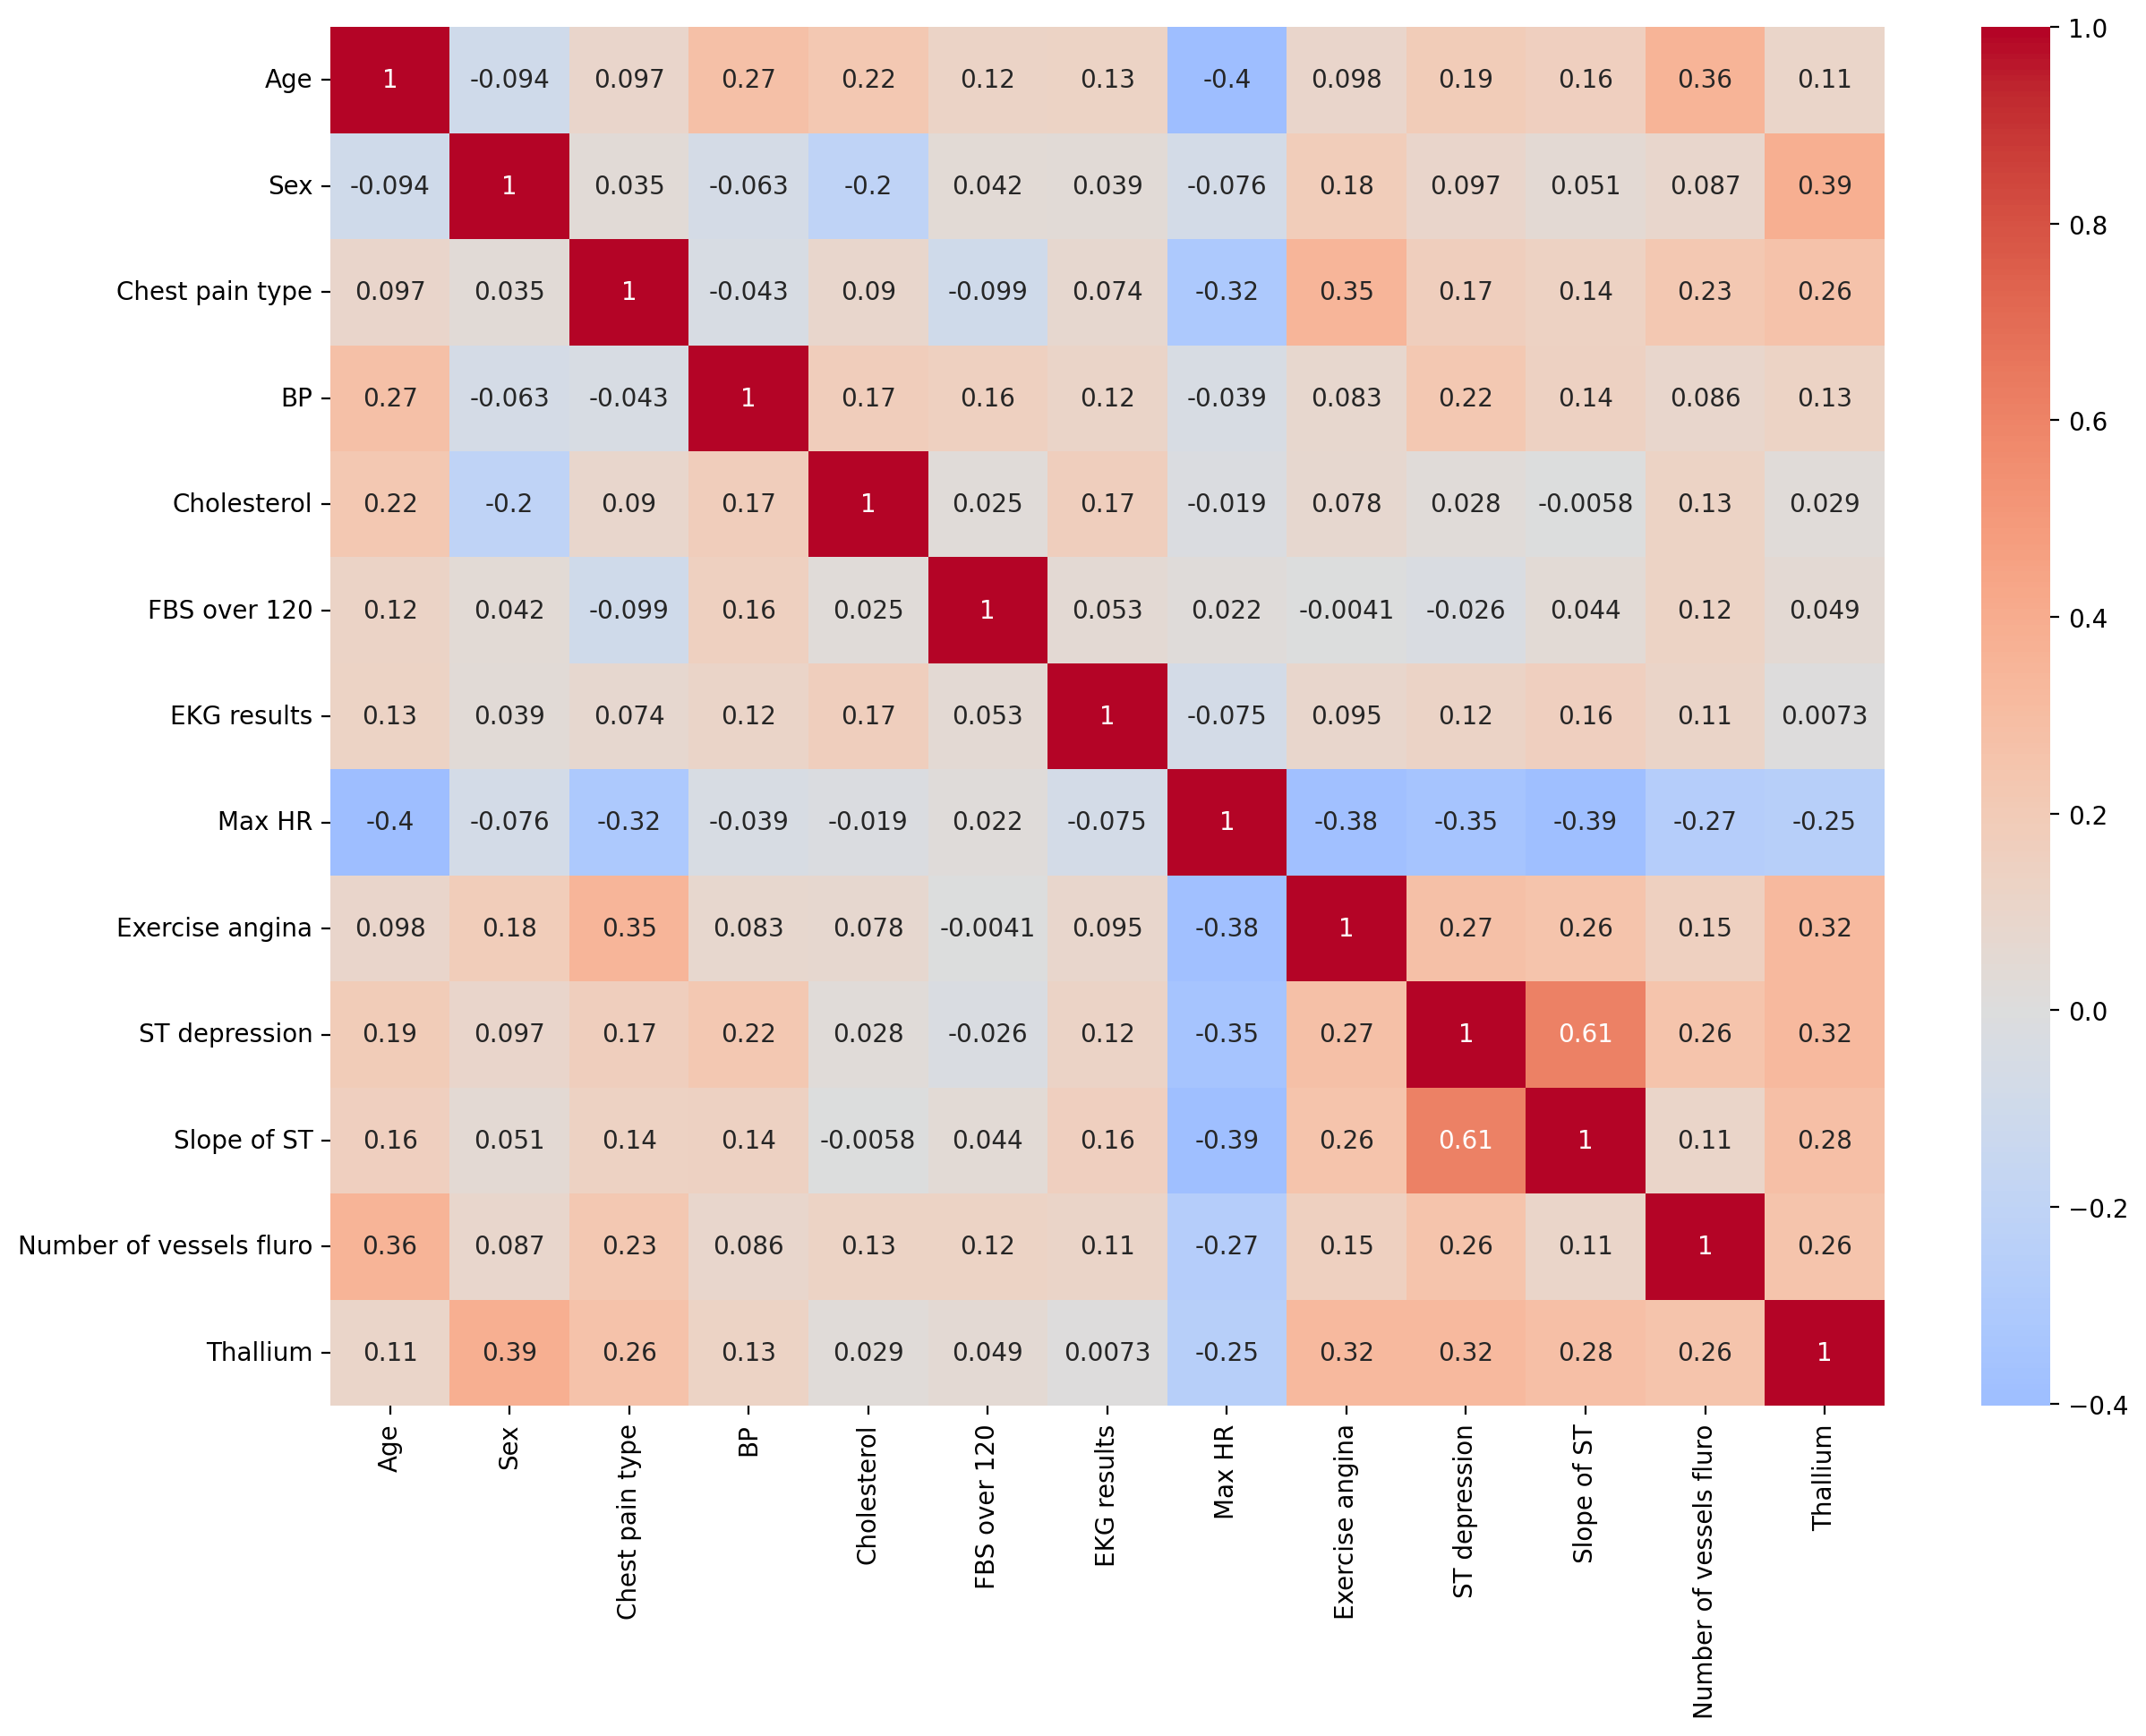

In [6]:
fig, ax = plt.subplots(figsize=(14, 10), dpi=200)

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, ax=ax);

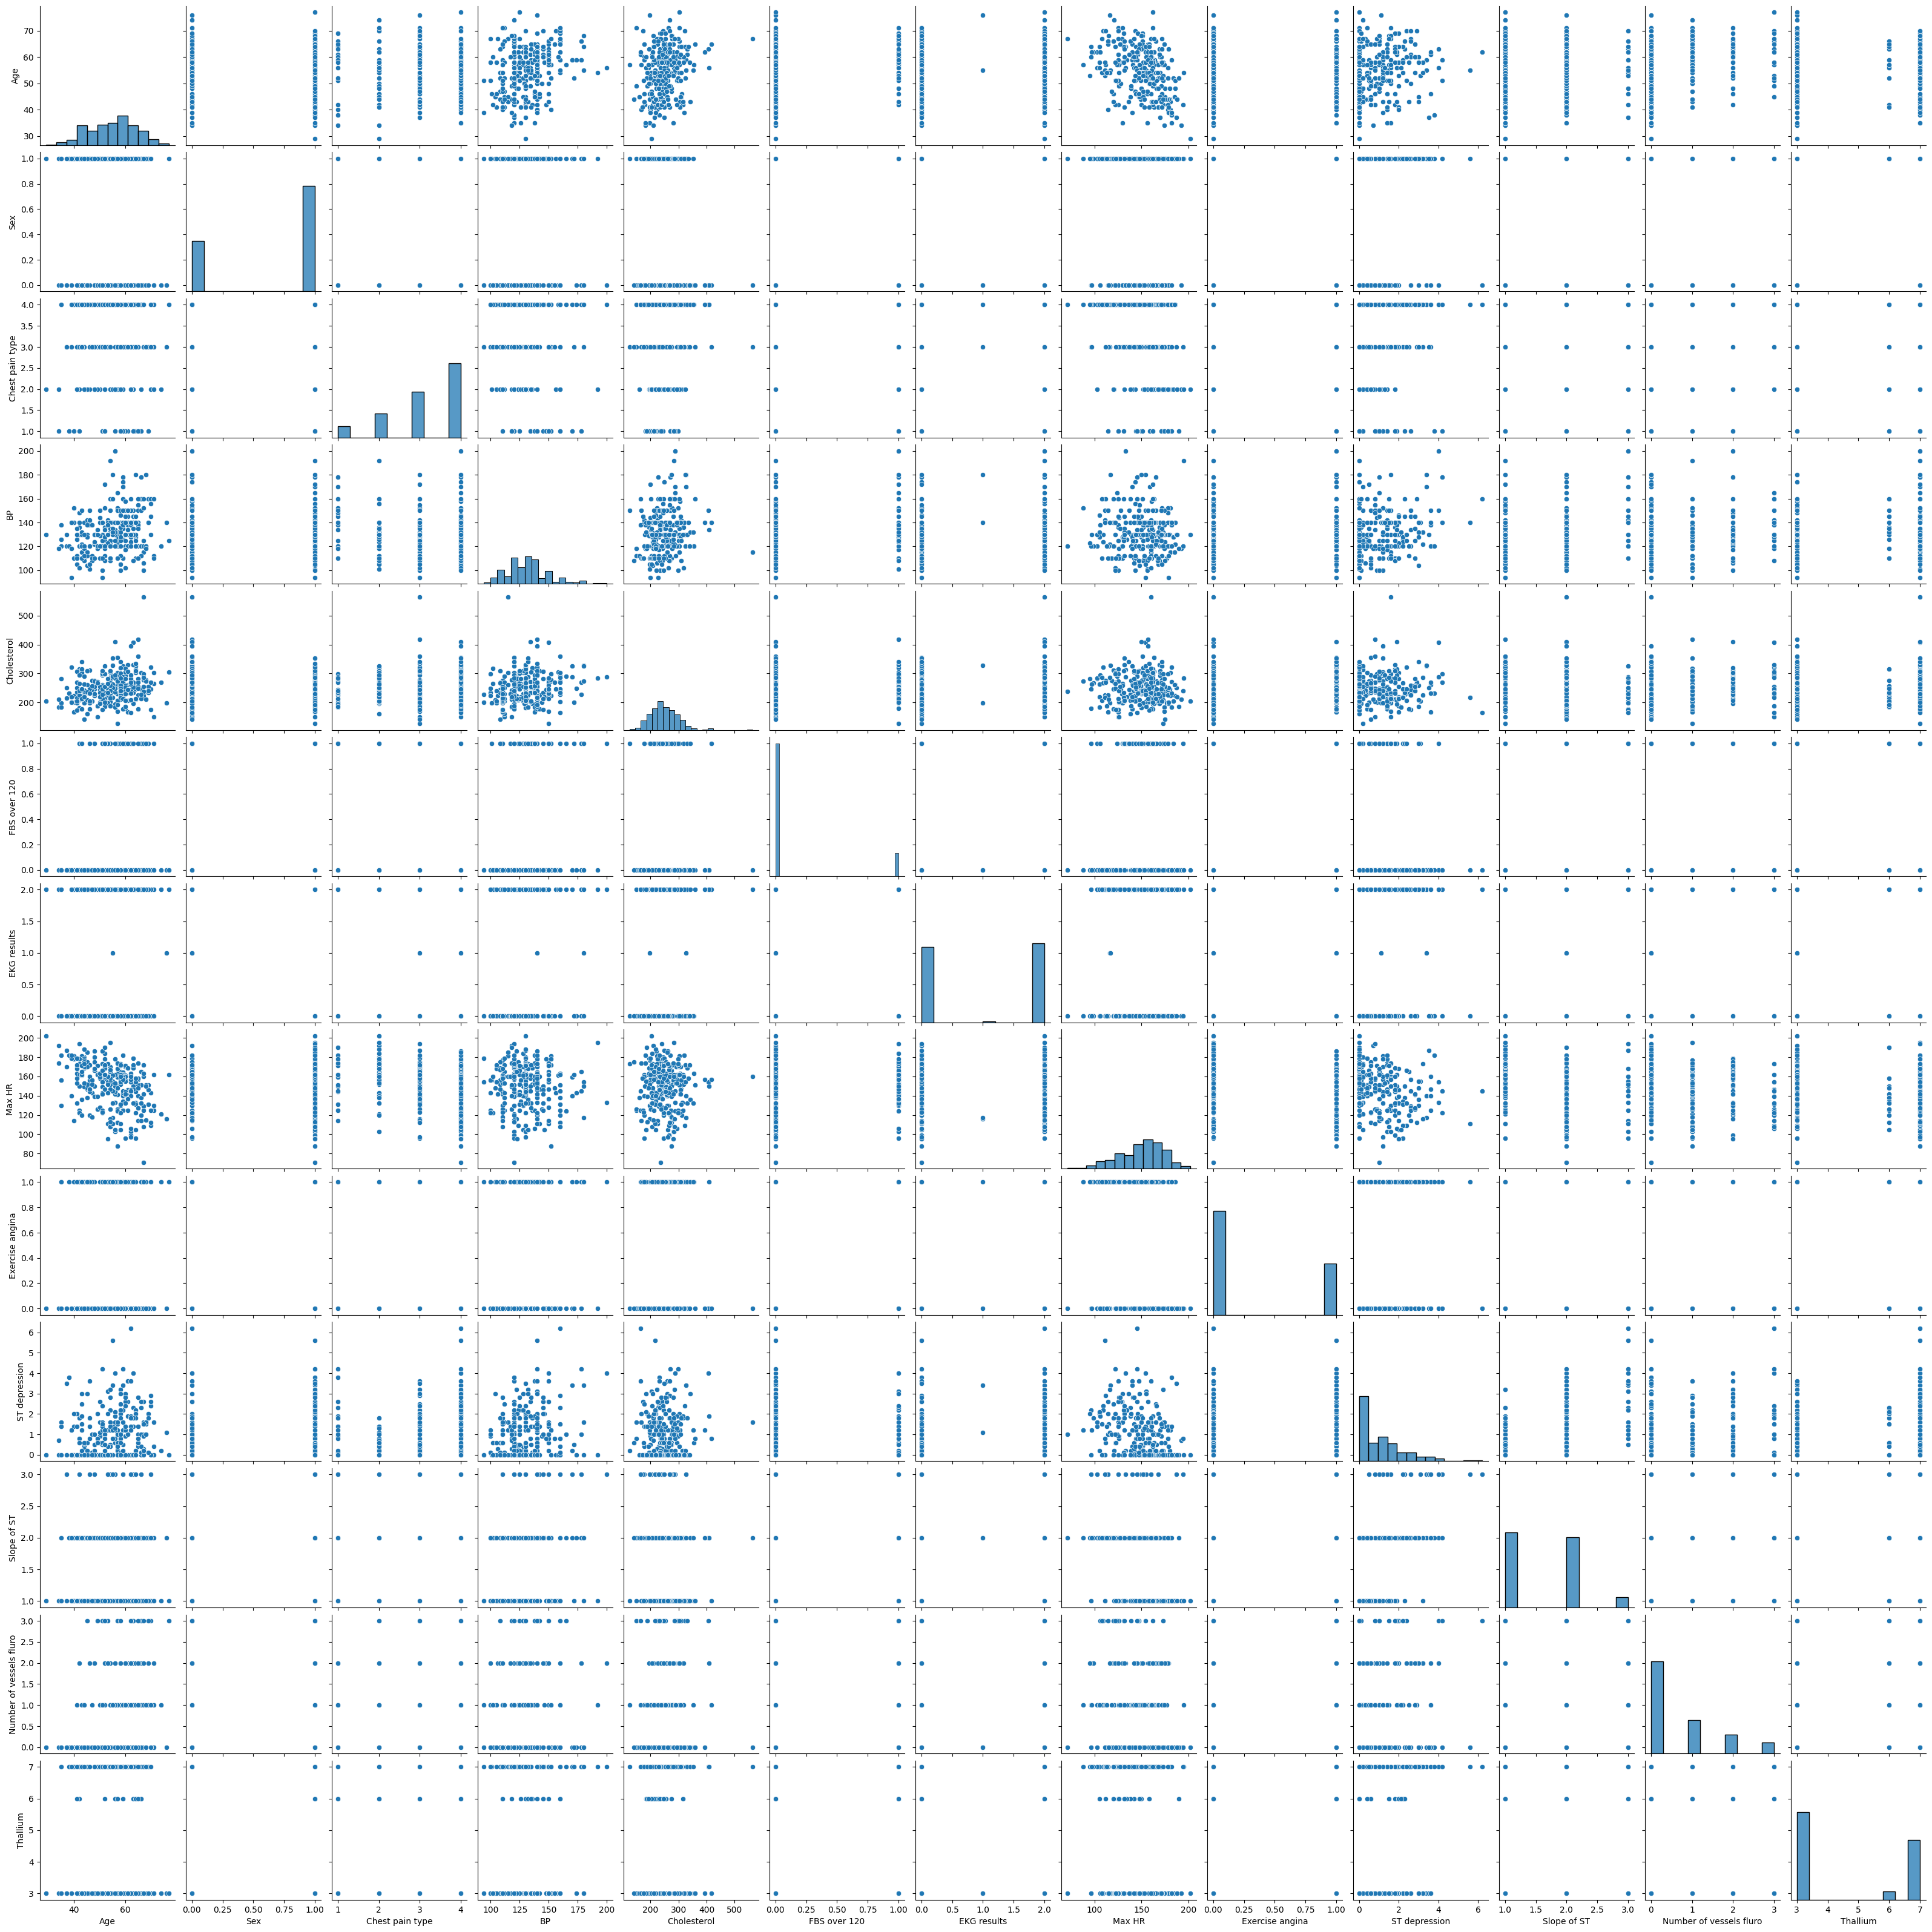

In [7]:
sns.pairplot(df)
plt.show()

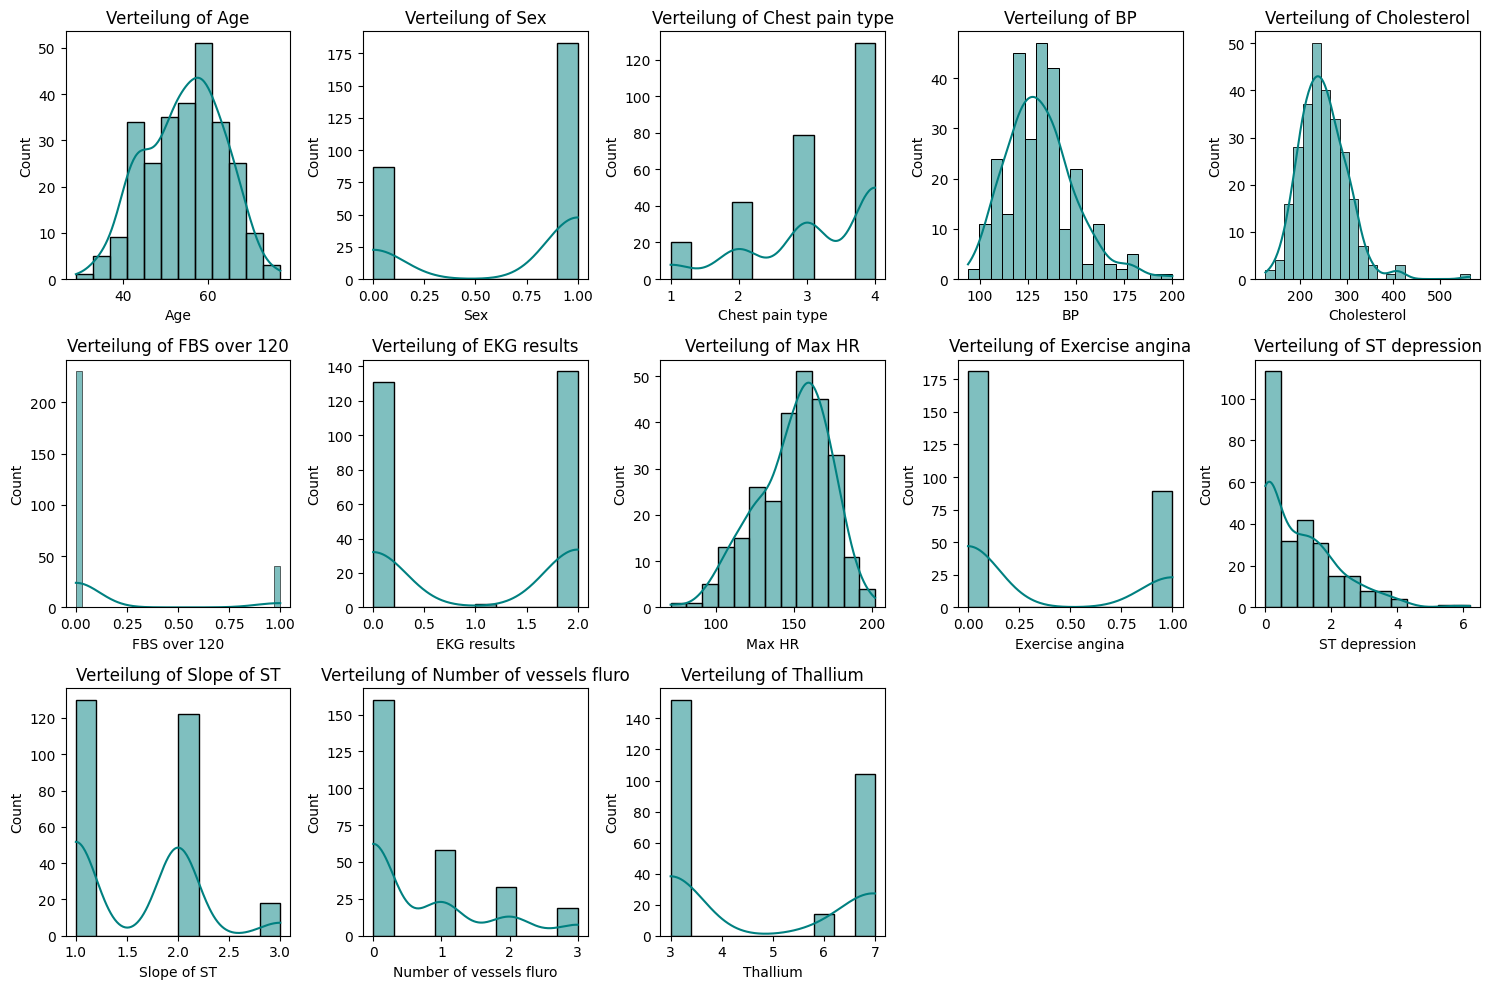

In [8]:
from statistics import kde
from turtle import color
from unicodedata import numeric


plt.figure(figsize= (15,10))
numerical_cols = df.select_dtypes(include= 'number').columns
for i, col in enumerate(numerical_cols):
    plt.subplot(3,5, i+1)
    sns.histplot(df[col], kde = True, color = 'teal')
    plt.title(f'Verteilung of {col}')

plt.tight_layout()
plt.show()

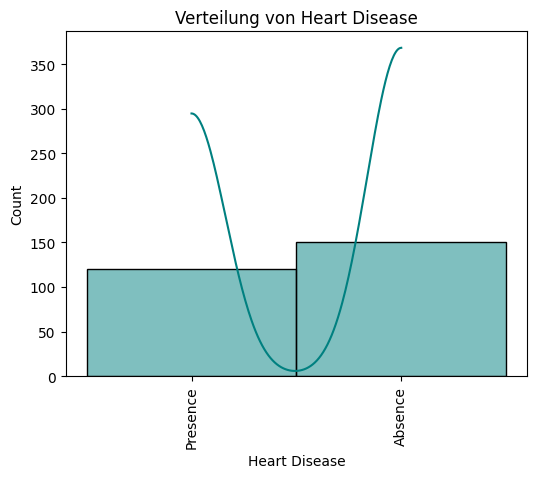

In [9]:
plt.figure(figsize= (15,8))
category_col = df.select_dtypes(include= 'object').columns 
for i, col in enumerate(category_col):
    plt.subplot(2,3, i+1)
    sns.histplot(df[col], kde= True, color= 'teal')
    plt.title(f'Verteilung von {col}')

plt.tight_layout()
plt.xticks(rotation= 90)
plt.show()

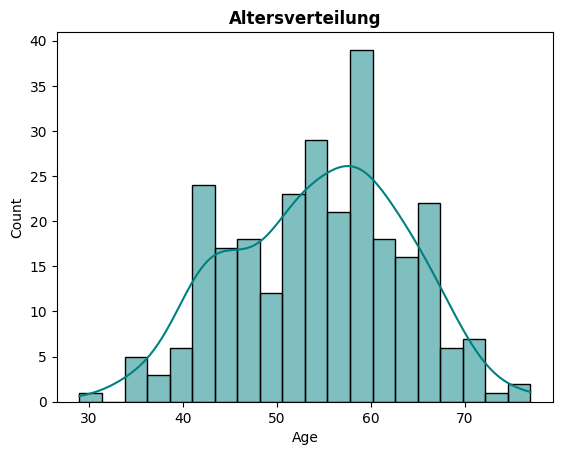

In [10]:
sns.histplot(df['Age'], bins = 20, kde = True, color= 'teal')
plt.title('Altersverteilung', fontweight = 'bold')
plt.show()

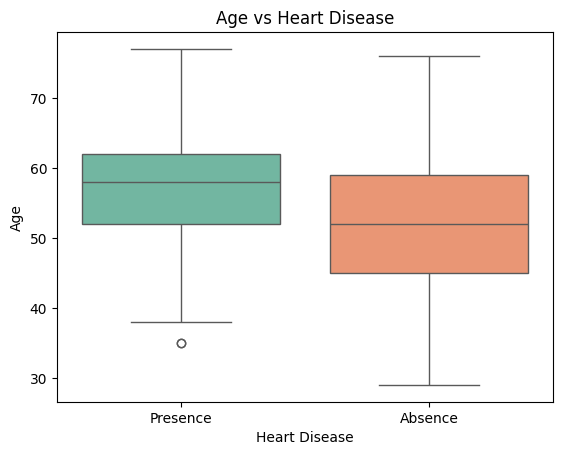

In [11]:
sns.boxplot(
    x="Heart Disease",
    y="Age",
    hue="Heart Disease",
    data=df,
    palette="Set2",
    legend=False
)

plt.title('Age vs Heart Disease')
plt.show()

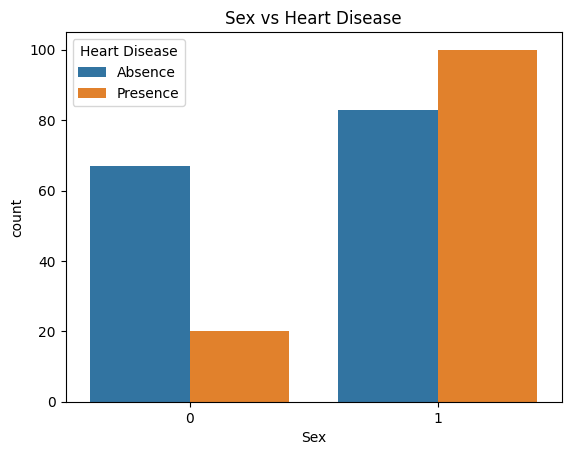

In [12]:
#1 = Male, 0 = Female
sns.countplot(x = 'Sex', hue = 'Heart Disease', data= df)
plt.title('Sex vs Heart Disease')
plt.show()

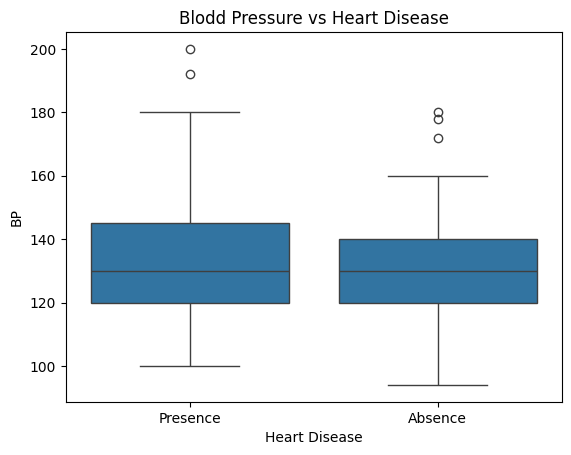

In [13]:
sns.boxplot(x = 'Heart Disease', y = 'BP', data=df)
plt.title('Blodd Pressure vs Heart Disease')
plt.show()

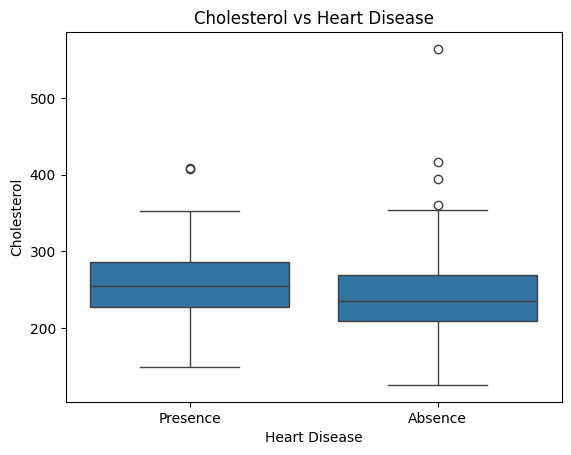

In [14]:
sns.boxplot(x = 'Heart Disease', y = 'Cholesterol', data=df)
plt.title('Cholesterol vs Heart Disease')
plt.show()

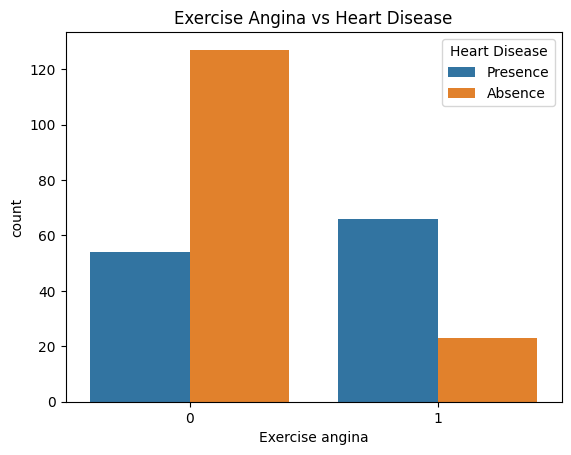

In [15]:
sns.countplot(x = 'Exercise angina', hue = 'Heart Disease', data=df)
plt.title('Exercise Angina vs Heart Disease')
plt.show()

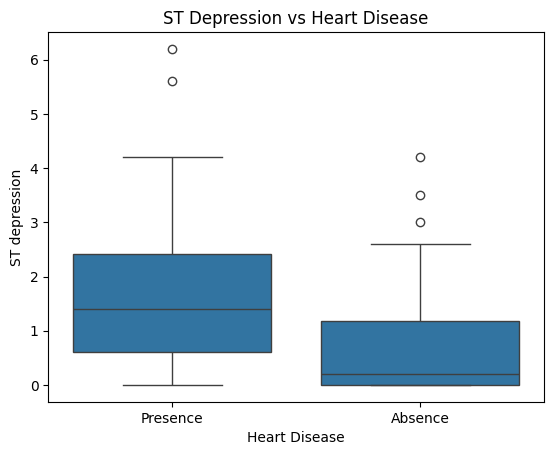

In [16]:
sns.boxplot(x = 'Heart Disease', y = 'ST depression', data=df)
plt.title('ST Depression vs Heart Disease')
plt.show()

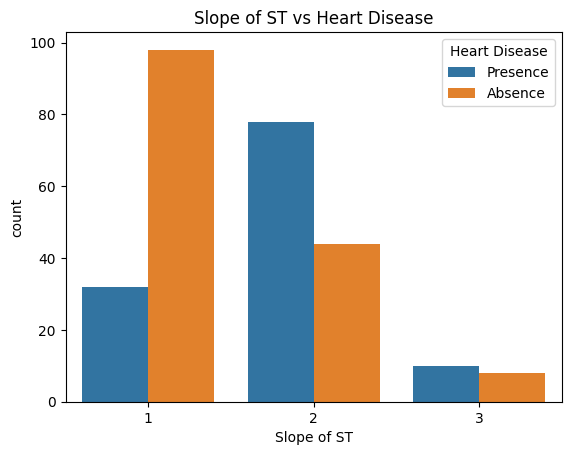

In [17]:
sns.countplot(x = 'Slope of ST', hue = 'Heart Disease', data=df)
plt.title('Slope of ST vs Heart Disease')
plt.show()

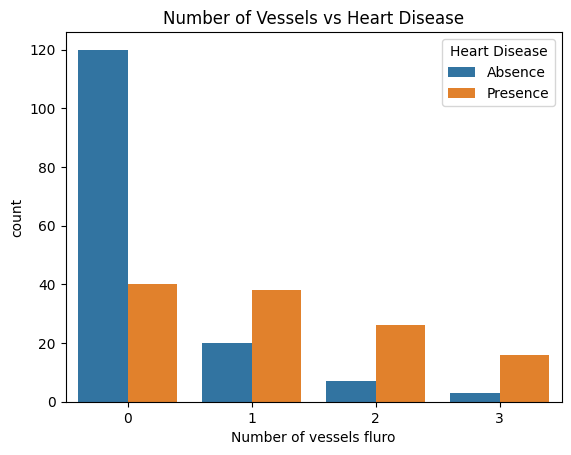

In [18]:
sns.countplot(x = 'Number of vessels fluro', hue = 'Heart Disease', data=df)
plt.title('Number of Vessels vs Heart Disease')
plt.show()

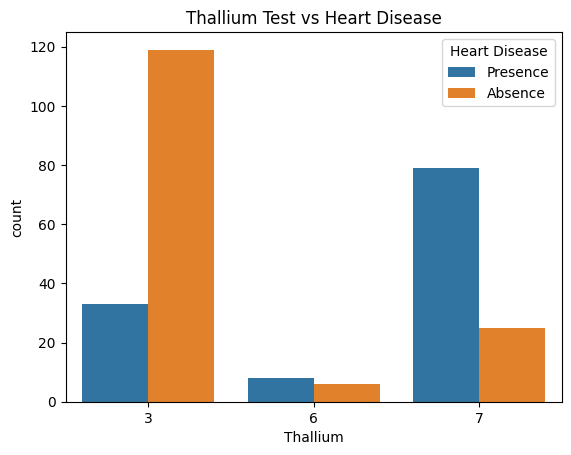

In [19]:
sns.countplot(x = 'Thallium', hue = 'Heart Disease', data=df)
plt.title('Thallium Test vs Heart Disease')
plt.show()

Correlation

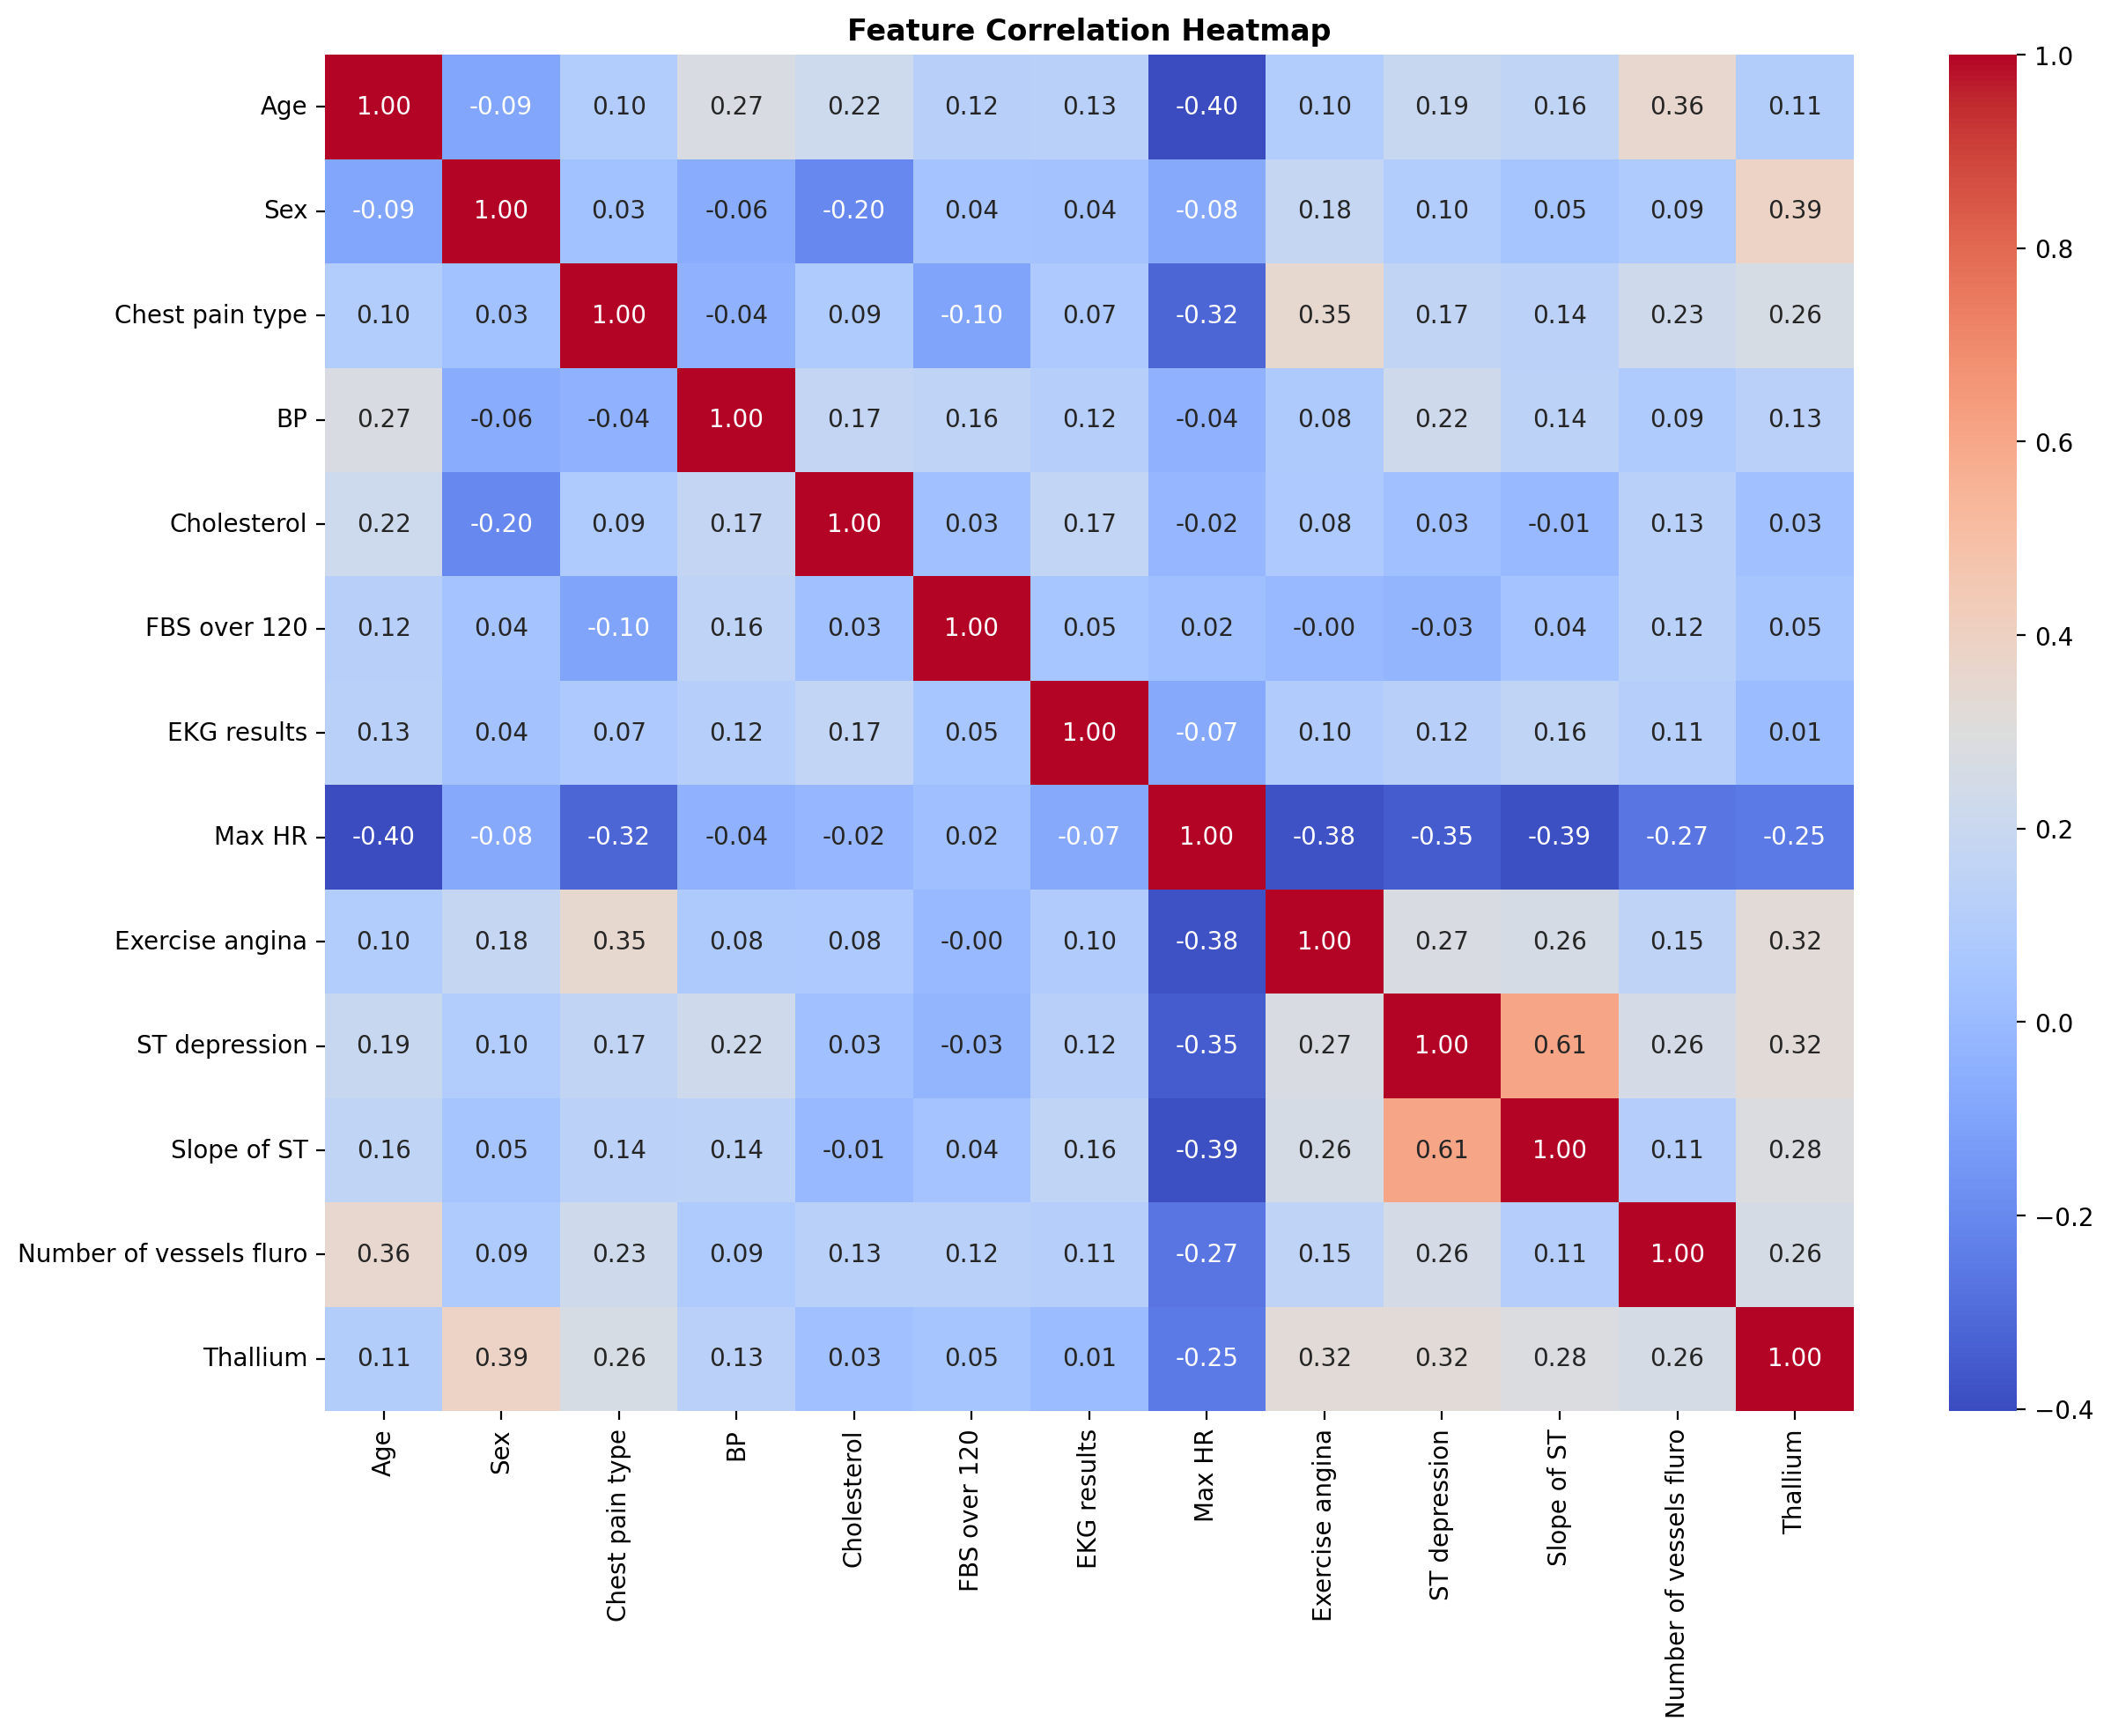

In [20]:
plt.figure(figsize= (14,10),dpi=200)
corr = df.drop('Heart Disease', axis= 1).corr()
sns.heatmap(corr, annot= True, cmap= 'coolwarm', fmt= '.2f')
plt.title('Feature Correlation Heatmap', fontweight= 'bold')
plt.show()

In [21]:
df['Heart Disease'] = [int(i=='Presence') for i in df['Heart Disease']]

In [22]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


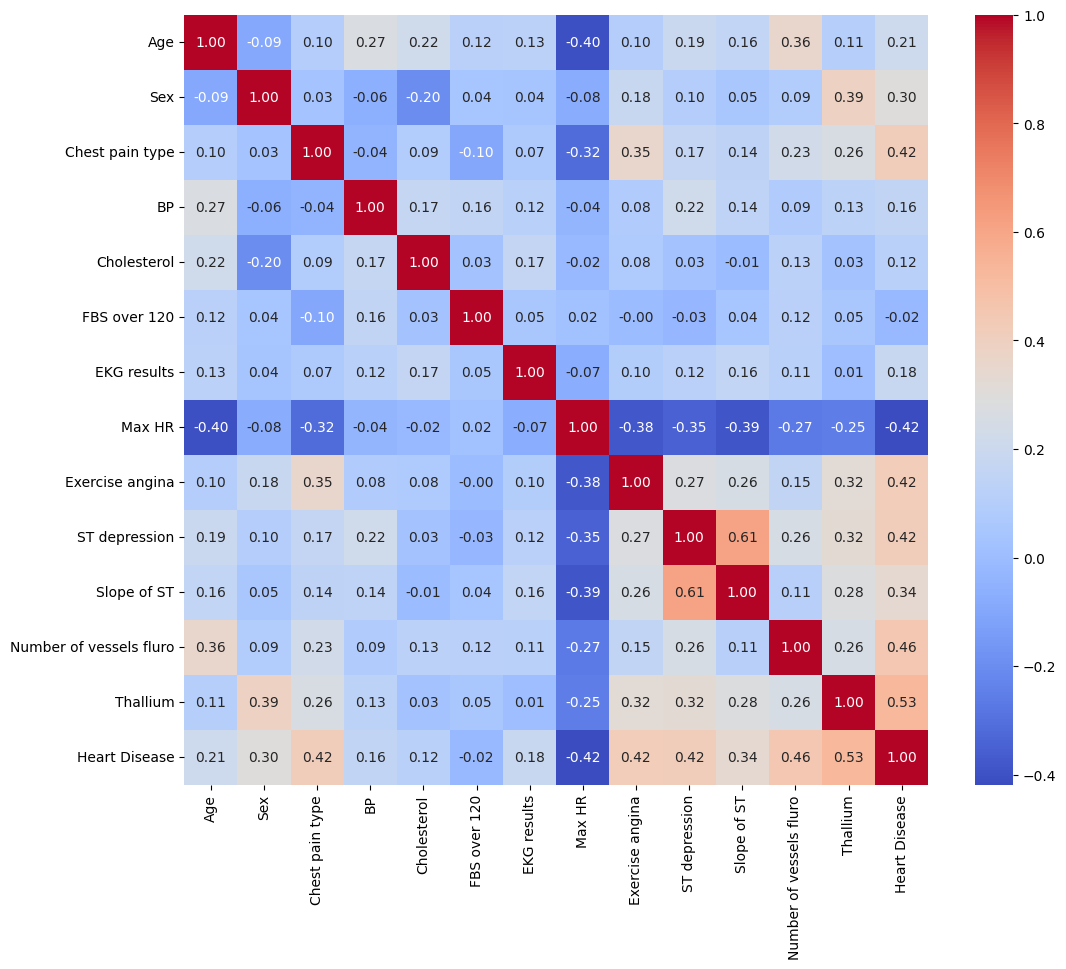

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,0.118021
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,-0.418514
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967


In [23]:
corr = df.corr()
corr = corr
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()
corr

In [24]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [25]:







import statsmodels.formula.api as smf
df = df.rename(columns={"Heart Disease": "Heart_Disease"})
model = smf.logit(formula="Heart_Disease ~ Age", data=df)
results1 = model.fit()
results1.summary()

Optimization terminated successfully.
         Current function value: 0.663930
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Heart_Disease   No. Observations:                  270
Model:                          Logit   Df Residuals:                      268
Method:                           MLE   Df Model:                            1
Date:                Tue, 13 Jan 2026   Pseudo R-squ.:                 0.03353
Time:                        09:55:35   Log-Likelihood:                -179.26
converged:                       True   LL-Null:                       -185.48
Covariance Type:            nonrobust   LLR p-value:                 0.0004209
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9031      0.796     -3.646      0.000      -4.464      -1.343
Age            0.0490      0.014      3.424      0.001       0.021       0.077
==============================================================================
"""

Ab dem Alter von 60 Jahren besteht ein erhöhtes Risiko für eine Herzerkrankung.


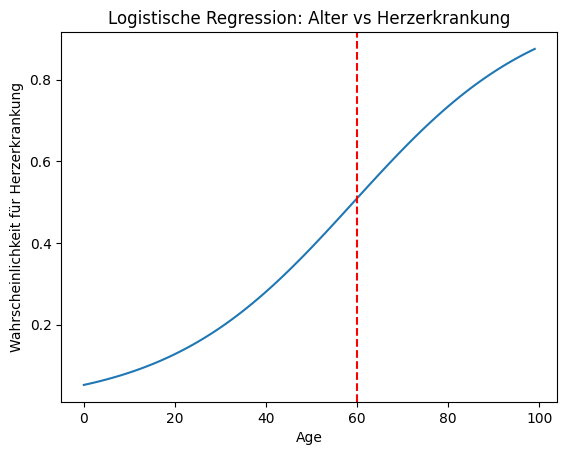

In [26]:
# erzeugen einer serie
X= pd.Series(range(100))
X_df = pd.DataFrame(X)
X_df.columns = ['Age']
X_df.head()
p_y = results1.predict(X_df)

fig, ax = plt.subplots()
p_y.plot(ax=ax)
ax.set(xlabel='Age', ylabel='Wahrscheinlichkeit für Herzerkrankung', title='Logistische Regression: Alter vs Herzerkrankung')
Herzerkrankung_Age = p_y[p_y>=0.5].index[0]
ax.axvline(x=Herzerkrankung_Age, color='red', linestyle='--')
print(f'Ab dem Alter von {Herzerkrankung_Age} Jahren besteht ein erhöhtes Risiko für eine Herzerkrankung.')

In [27]:

model2 = smf.logit("Heart_Disease ~ Age", data=df).fit()
params = model2.params
odds_ratios = np.exp(params)
print(odds_ratios)

df["pred_prob"] = model2.predict(df)
df[["Heart_Disease", "pred_prob"]].head()


Optimization terminated successfully.
         Current function value: 0.663930
         Iterations 5
Intercept    0.054852
Age          1.050238
dtype: float64


,Heart_Disease,pred_prob
0,1,0.629034
1,0,0.594119
2,1,0.472740
3,0,0.558227
4,0,0.673518


In [29]:
model = smf.logit(formula="Heart_Disease ~ Thallium", data=df)
results2 = model.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.542768
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Heart_Disease   No. Observations:                  270
Model:                          Logit   Df Residuals:                      268
Method:                           MLE   Df Model:                            1
Date:                Tue, 13 Jan 2026   Pseudo R-squ.:                  0.2099
Time:                        10:09:14   Log-Likelihood:                -146.55
converged:                       True   LL-Null:                       -185.48
Covariance Type:            nonrobust   LLR p-value:                 1.104e-18
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.0979      0.384     -8.059      0.000      -3.851      -2.344
Thallium       0.6026      0.074      8.117      0.000       0.457       0.748
==============================================================================
"""

Text(0.5, 1.0, 'Predicted Probability of Heart Disease by Thallium Test Result')

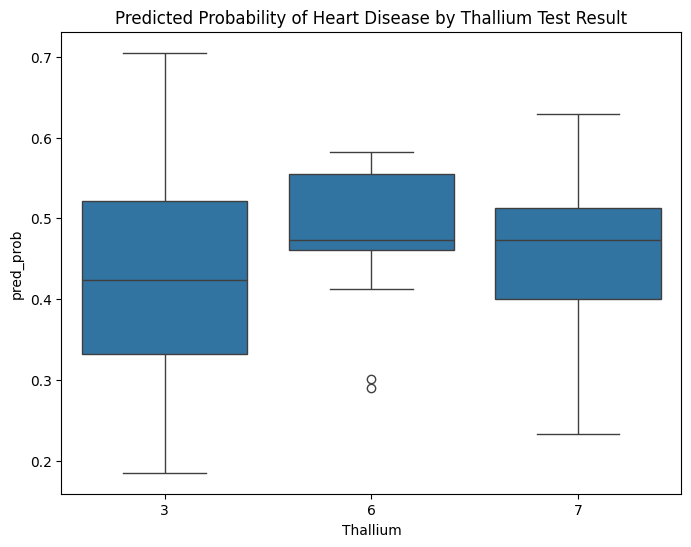

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Thallium", y="pred_prob", data=df)
plt.title("Predicted Probability of Heart Disease by Thallium Test Result")

In [35]:

model = smf.logit(formula="Heart_Disease ~ Thallium", data=df)
results2 = model.fit()

Optimization terminated successfully.
         Current function value: 0.542768
         Iterations 5


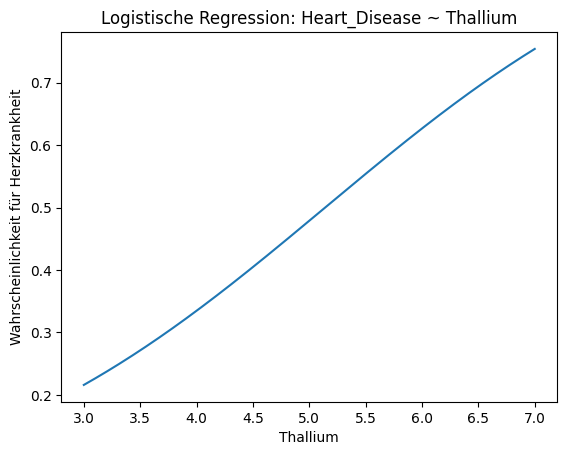

In [38]:
# Wertebereich für Thallium
thallium_range = np.linspace(df["Thallium"].min(), df["Thallium"].max(), 270)

# DataFrame für Vorhersage
pred_df = df.copy()
pred_df = pred_df.iloc[:270].copy()
pred_df["Thallium"] = thallium_range

# Vorhersagen
pred_probs = results2.predict(pred_df)

# Plot
plt.figure()
plt.plot(thallium_range, pred_probs)
plt.xlabel("Thallium")
plt.ylabel("Wahrscheinlichkeit für Herzkrankheit")
plt.title("Logistische Regression: Heart_Disease ~ Thallium")
plt.show()

Optimization terminated successfully.
         Current function value: 0.542402
         Iterations 5


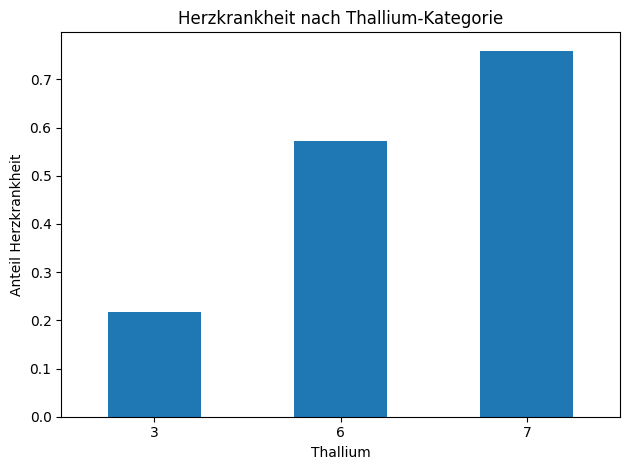

In [51]:
model = smf.logit("Heart_Disease ~ C(Thallium)", data=df)
results2 = model.fit()
means = df.groupby("Thallium")["Heart_Disease"].mean()

plt.figure()
means.plot(kind="bar")

plt.xlabel("Thallium")
plt.ylabel("Anteil Herzkrankheit")
plt.title("Herzkrankheit nach Thallium-Kategorie")

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


